# Understanding the GalaxyChop Galaxies

GalaxyChop was designed to define a class Galaxy which encapsulates all the physical properties useful for the dynamic decomposition.

This chapter aims to explain the funcionalities of a class Galaxy, which is represented with a class called `galaxychop.Galaxy`. This tutorial will help the user to:

- Build a galaxy object 
 
- Understand deeply the Galaxy Class (attributes, properties and funtionalities)
 
- Prepare the galaxy object to decompose

## 1. Creating the galaxy object

To create an object of type Galaxy it is necessary to collect data from a single galaxy.
The data should include stellar, dark matter and gas particles, with their masses (m), positions (x, y, z) and velocities (vx, vy, vz). 

There are several alternatives to load the Galaxy object:

    - Load data manually, 
    - Reading data from a npy file,
    - Reading the data from a HDF5 file.

So first of all it is necessary to obtain a file with the appropriate content.

<div class="alert alert-info">
Note: Units
    
To create a galaxy object, the data must be entered with units. Masses in M⊙, positions in kpc, velocities in km/s and potential energy in (km/s)^2.
    
We use the package units from astropy. For more details, see the documentation.
</div>

### Load data manually
This is a example of load a data from three differents files for each type of particle (star, gas and dark matter).

Every file has information of mass, positions, and velocities for each particle.

We load the data using the `mkgalaxy` function. (hacer link a la docu).
This will generate an instance of the gchop.Galaxy class

In [1]:
import numpy as np
import galaxychop as gchop

star = np.load("../../../tests/datasets/star_ID_394242.npy")
dark = np.load("../../../tests/datasets/dark_ID_394242.npy")
gas = np.load("../../../tests/datasets/gas_ID_394242.npy")

galaxy = gchop.mkgalaxy(m_s=star[:, 0],
                        x_s=star[:, 1],
                        y_s=star[:, 2],
                        z_s=star[:, 3],
                        vx_s=star[:, 4],
                        vy_s=star[:, 5],
                        vz_s=star[:, 6],
                        m_dm=dark[:, 0], 
                        x_dm=dark[:, 1], 
                        y_dm=dark[:, 2], 
                        z_dm=dark[:, 3],
                        vx_dm=dark[:, 4], 
                        vy_dm=dark[:, 5], 
                        vz_dm=dark[:, 6],
                        m_g=gas[:, 0],
                        x_g=gas[:, 1],
                        y_g=gas[:, 2],
                        z_g=gas[:, 3],
                        vx_g=gas[:, 4],
                        vy_g=gas[:, 5],
                        vz_g=gas[:, 6])
galaxy

<Galaxy stars=32067, dark_matter=21156, gas=4061, potential=False>

<div class="alert alert-info">
Nota: Specific potential energy
    
Files containing particle potentials can be included.
 
</div>

#### Specific Potential Energy

Specific Potential Energy can be calculated or load according to user requirements:

 - **Calculated**
 
    The packages allows the calculation of the specific potential energy of each particle.
    
     Using the `preproc.potential` function, the users can choose between the 'numpy' or 'fortran' banckends to perform the calculation, and can set the softening value for each particle type (defoult=0.0). 
     
     The user can validate whether the instantiated galaxy has potential by using the following sentence:

In [2]:
print("Galaxy has potential:", galaxy.has_potential_)

Galaxy has potential: False


In [3]:
#galaxy = gchop.preproc.potential(galaxy, backend='fortran')
#galaxy = gchop.preproc.potential(galaxy, backend='numpy')

After the calculation, it can be checked that the instantiated galaxy has potential

In [4]:
print("Galaxy has potential:", galaxy.has_potential_)

Galaxy has potential: False


 - **Load**
 
    The specific potential energy for all particles can be load at the same time as the galaxy is instantiated.
    Particle potentials can be included as attributes of `mkgalaxy` function, as well as the softening parameter.

    Note that the potential energy we use here is an specific potential energy.

In [5]:
#? gchop.preproc.potential
#? gchop.mkgalaxy

In [6]:
pot_star = np.load("../../../tests/datasets/potential_star_ID_394242.npy")
pot_dark = np.load("../../../tests/datasets/potential_dark_ID_394242.npy")
pot_gas = np.load("../../../tests/datasets/potential_gas_ID_394242.npy")


galpot = gchop.mkgalaxy(m_s=star[:, 0],
                        x_s=star[:, 1],
                        y_s=star[:, 2],
                        z_s=star[:, 3],
                        vx_s=star[:, 4],
                        vy_s=star[:, 5],
                        vz_s=star[:, 6],
                        m_dm=dark[:, 0], 
                        x_dm=dark[:, 1], 
                        y_dm=dark[:, 2], 
                        z_dm=dark[:, 3],
                        vx_dm=dark[:, 4], 
                        vy_dm=dark[:, 5], 
                        vz_dm=dark[:, 6],
                        m_g=gas[:, 0],
                        x_g=gas[:, 1],
                        y_g=gas[:, 2],
                        z_g=gas[:, 3],
                        vx_g=gas[:, 4],
                        vy_g=gas[:, 5],
                        vz_g=gas[:, 6],
                        softening_s=0.0,
                        softening_dm=0.0,
                        softening_g=0.0,
                        potential_s=pot_star[:],
                        potential_dm=pot_dark[:],
                        potential_g=pot_gas[:])
galpot

<Galaxy stars=32067, dark_matter=21156, gas=4061, potential=True>

In [7]:
print("Galaxy has potential:", galaxy.has_potential_)

Galaxy has potential: False


### Reading data from a "npy" file
Using the above files, the galaxy can be loaded using a read function provided by the package: `read_npy` (link a la docu). To use this function are nessesary the paths to npy files and specify all column names in the file.

This will generate an instance of the gchop.Galaxy class.

In [8]:
#?gchop.io.read_hdf5

In [9]:
galaxy = gchop.io.read_npy("../../../tests/datasets/star_ID_394242.npy",
                           "../../../tests/datasets/dark_ID_394242.npy",
                           "../../../tests/datasets/gas_ID_394242.npy", 
                           columns=["m", "x", "y", "z", "vx", "vy", "vz", "id"])
galaxy

<Galaxy stars=32067, dark_matter=21156, gas=4061, potential=False>

### Reading data from a HDF file

The galaxy can be loaded using a read function provided by the package: `read_hdf5` (link a la docu).
The HDF5 file must have the datasets with the names "stars", "dark_matter" and "gas".

In [10]:
!h5ls gal394242.h5
!h5dump -n gal394242.h5

dark_matter              Dataset {21156}
gas                      Dataset {4061}
stars                    Dataset {32067}
HDF5 "gal394242.h5" {
FILE_CONTENTS {
 group      /
 dataset    /dark_matter
 dataset    /gas
 dataset    /stars
 }
}


This generate automatically an instance of the gchop.Galaxy class

In [11]:
galaxy = gchop.io.read_hdf5("gal394242.h5")
galaxy

<Galaxy stars=32067, dark_matter=21156, gas=4061, potential=True>

### Convert data in HDF5 file

Function `to_hdf5` (link a reading hdf5) is responsible for storing a galaxy in HDF5 format.

Once the galaxy is instantiated, the package provides this function to generate a single hdf5 file to easily read and instantiate the galaxy.
Then, the user can use the function `read_hdf5` to instanciate the galaxy object.

For example, if the user wish save the galaxy instanciated mannually:

In [12]:
gg=gchop.io.to_hdf5("../../../../newfile.h5", galaxy)

## 2. Instance of the `gchop.Galaxy` class.

In this tutorial we use a preloaded dataset offered by GalaxyChop. The data correspond to a galaxy belonging to the Illustris-TNG hydrodynamic cosmological simulations (for more information see https://www.tng-project.org/).

In [13]:
import galaxychop as gchop
gal = gchop.io.read_hdf5("gal394242.h5")
gal

<Galaxy stars=32067, dark_matter=21156, gas=4061, potential=True>

### Attributes

Galaxies internally consist of three sets of particles , one for stars, one for dark_matter and one for gas.

All these sets can be accessed, and expose a set of physical properties for each particle:
- position (x,y,z)
- velocity (vx,vy,vz)
- mass
- specific potential energy and softening

For example, if the user wanted to access the positions (x, y, and z) of the stellar particles:

In [14]:
gal.stars.x, gal.stars.y, gal.stars.z

(<Quantity [ 0.12017286, -0.01992682, -0.09766993, ..., 15.06957949,
            17.21394372,  9.28556454] kpc>,
 <Quantity [ 1.51520602e-03,  3.25905789e-02, -2.27875536e-02, ...,
             4.52400820e+00, -1.96094867e-01,  1.15665035e+01] kpc>,
 <Quantity [-3.73908514e-02,  5.12012087e-03,  4.66359649e-02, ...,
             1.15501605e+01, -1.40433638e+01,  7.57282498e+00] kpc>)

It can be observed that the positions have units which can be bypassed using the `arr_ accessor`.

For example if the user would like to access the gas masses (m) but without units:

In [15]:
gal.gas.arr_.m

array([2579202.70087197, 1368584.63520184, 1392260.60127839, ...,
        990849.80320185, 1456959.43501778, 1760535.66974588])

In [16]:
gal.stars.potential

<Quantity [-195699.62020621, -196176.96227715, -195152.12016824, ...,
           -105057.17291735, -101280.15575698, -111482.51641398] km2 / s2>

In [17]:
gal.stars.softening

0.0

### Properties

Once the data has been loaded and the galaxy has been created, this is an instantiated object of the `Galaxy class`.


 The galaxy object contains a series of physical and visualisation properties for each particle:
 - Specific potential energy: gal.potential_energy_
 - Specific kinetical energy: gal.kinetic_energy_
 - Specific total energy: gal.total_energy_
 - Specific angular momentum: gal.angular_momentum_
 - Data Frame of all properties of all galaxy particles: gal.to_dataframe
 - Visulization of galaxy: gal.plot

The user can access all properties in the following way:

 - Physical properties

In [18]:
gal.kinetic_energy_, gal.potential_energy_, gal.total_energy_

((<Quantity [  290.29311099,   274.78291519,   193.69961166, ...,
             77586.50211169, 84005.37330246, 98418.90008429] km2 / s2>,
  <Quantity [   852.93881446,    352.11250177,    624.76341209, ...,
              96858.46837754,  92196.00956268, 108865.99592875] km2 / s2>,
  <Quantity [ 2635.95518371,  2705.79372566,  2861.71063971, ...,
             34356.53984688, 46006.91390953, 58613.22415986] km2 / s2>),
 (<Quantity [-195699.62020621, -196176.96227715, -195152.12016824, ...,
             -105057.17291735, -101280.15575698, -111482.51641398] km2 / s2>,
  <Quantity [-194263.97464369, -193864.21447827, -193553.97933144, ...,
             -102896.99665186,  -97464.72565143, -109420.64426509] km2 / s2>,
  <Quantity [-189770.98821548, -189253.15479293, -189087.35939466, ...,
             -132966.10262098, -132205.10676226, -127609.95554887] km2 / s2>),
 (<Quantity [-195409.32709522, -195902.17936196, -194958.42055658, ...,
              -27470.67080566,  -17274.78245451,  -13063

In [19]:
 gal.angular_momentum_

(<Quantity [[-2.88156850e-01, -3.03363713e-01, -7.79147710e-02, ...,
              2.48736681e+03,  2.97736815e+03, -2.84906599e+03],
            [ 2.05174564e+00, -5.45202103e-02, -1.75146144e+00, ...,
             -8.54643494e+02,  7.43903994e+03,  5.07802536e+03],
            [-8.42982046e-01, -8.33618731e-01, -1.01898720e+00, ...,
             -2.91053597e+03,  3.54569539e+03, -4.26258525e+03]] km kpc / s>,
 <Quantity [[ 2.34709420e+00, -4.94097528e+00,  3.77436572e+00, ...,
              5.39453478e+03,  1.40042593e+03,  6.72572808e+03],
            [-9.62469259e-01, -2.37170124e+00, -4.74950939e+00, ...,
             -7.25121704e+03, -6.40603761e+03, -3.23199926e+03],
            [ 7.83975536e+00, -1.90612984e+00,  5.16117519e+00, ...,
              2.63450603e+03, -6.35649599e+03, -3.41031955e+03]] km kpc / s>,
 <Quantity [[ -18.87261051,  -30.83281637,   -2.82274674, ...,
             -335.26257476,  391.93947927,  494.97120016],
            [  12.30423471,    9.91757106,   18.

Finally, the galaxy is represented by its set of particles and their properties.

- Visualisation properties:

The user can see it in data frame format using the property `to_dataframe`.
This method create Pandas DataFrames with the particle data.

In [20]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,0.120173,0.001515,-0.037391,10.773575,-6.878906,-20.425400,0.0,-195699.620206,290.293111,-195409.327095,-0.288157,2.051746,-0.842982
1,stars,0,9.745897e+05,-0.019927,0.032591,0.005120,20.282349,8.661957,-7.947495,0.0,-196176.962277,274.782915,-195902.179362,-0.303364,-0.054520,-0.833619
2,stars,0,6.935776e+05,-0.097670,-0.022788,0.046636,-14.897980,6.957092,-10.818886,0.0,-195152.120168,193.699612,-194958.420557,-0.077915,-1.751461,-1.018987
3,stars,0,1.070959e+06,-0.007224,-0.138971,0.176169,-8.665253,-4.337433,5.506927,0.0,-194695.767625,62.113089,-194633.654536,-0.001182,-1.486768,-1.172886
4,stars,0,6.013803e+05,0.095277,0.001167,0.100484,23.508469,-7.842865,-3.754723,0.0,-195703.942688,314.128285,-195389.814402,0.783702,2.719973,-0.774688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57279,gas,2,1.400046e+06,2.415113,-8.443658,-0.427454,117.975723,-243.209320,31.390686,0.0,-129252.826165,37027.209909,-92225.616256,-369.012963,-126.241204,408.768823
57280,gas,2,1.375867e+06,-4.756847,5.970680,-4.109694,-136.718105,232.501099,-56.024063,0.0,-129835.893336,37943.648417,-91892.244919,621.006707,295.371727,-289.672123
57281,gas,2,9.908498e+05,-9.376904,-1.965296,-0.563573,-188.311616,31.467773,179.615128,0.0,-132966.102621,34356.539847,-98609.562774,-335.262575,1790.361085,-665.158420
57282,gas,2,1.456959e+06,-6.880090,0.314529,-6.284694,-261.390251,69.243408,-137.456593,0.0,-132205.106762,46006.913910,-86198.192853,391.939479,697.043885,-394.186002


It is also possible to visualise the data only for a particular dataset:

In [21]:
gal.gas.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,gas,2,2.579203e+06,0.255179,-0.317399,-0.722907,1.739517,-49.440781,-53.145966,0.0,-189770.988215,2635.955184,-187135.033032,-18.872611,12.304235,-12.064137
1,gas,2,1.368585e+06,0.144436,-0.273204,-0.920894,-2.254318,-49.588120,-54.291103,0.0,-189253.154793,2705.793726,-186547.361067,-30.832816,9.917571,-7.778194
2,gas,2,1.392261e+06,0.436985,-0.442400,-0.524567,9.799744,-51.434387,-54.606686,0.0,-189087.359395,2861.710640,-186225.648755,-2.822747,18.721671,-18.140634
3,gas,2,1.548436e+06,0.070196,-0.149943,-0.991583,6.844009,-41.484070,-62.540501,0.0,-189119.151755,2839.541367,-186279.610388,-31.757357,-2.396288,-1.885816
4,gas,2,1.936515e+06,0.458794,-0.134292,-0.716227,-18.536072,-52.246674,-51.899296,0.0,-189389.528067,2883.418881,-186506.109186,-30.450792,37.087136,-26.459731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056,gas,2,1.400046e+06,2.415113,-8.443658,-0.427454,117.975723,-243.209320,31.390686,0.0,-129252.826165,37027.209909,-92225.616256,-369.012963,-126.241204,408.768823
4057,gas,2,1.375867e+06,-4.756847,5.970680,-4.109694,-136.718105,232.501099,-56.024063,0.0,-129835.893336,37943.648417,-91892.244919,621.006707,295.371727,-289.672123
4058,gas,2,9.908498e+05,-9.376904,-1.965296,-0.563573,-188.311616,31.467773,179.615128,0.0,-132966.102621,34356.539847,-98609.562774,-335.262575,1790.361085,-665.158420
4059,gas,2,1.456959e+06,-6.880090,0.314529,-6.284694,-261.390251,69.243408,-137.456593,0.0,-132205.106762,46006.913910,-86198.192853,391.939479,697.043885,-394.186002


Also, the user can visualise the data graphically using the `plot` method.

The defoult plot is a pairplot that split the data by particle type.

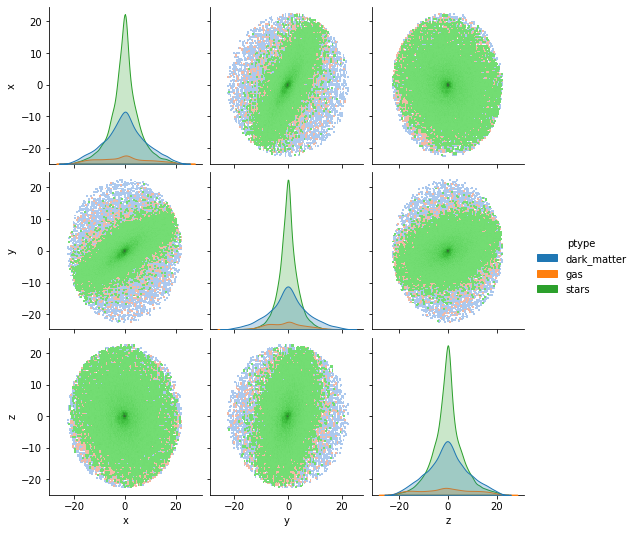

In [22]:
gal.plot()

For more details about the galaxy plotting options see Plotting Tutorial (link al tutorial).

## 3. Pre-processing methods and decomposition models

Useful methods for pre-processing the galaxy object to perform the dynamical decomposition:

 - Center funtion: `preproc.center(galaxy)`
 - Star align function : `preproc.star_alingn(galaxy)`
 - Circular angular momentum function : `preproc.jcirc(galaxy)`
 
The packages provides two function to validate if a galaxy is centered and aligned:

In [23]:
print("Centered:", gchop.preproc.is_centered(gal))
print("Aligned:", gchop.preproc.is_star_aligned(gal))

Centered: False
Aligned: False


In [24]:
#?gchop.preproc.star_align

First of all, to perform the dynamical decomposition is necesary center the position of all galaxy particles respect to the position of the lowest potential particle.

In [25]:
gal = gchop.preproc.center(gal)

Secondly, the position particles are rotatated so that the total angular moment of the stars particles coincides
with the z-axis.

Optionally, only stars particles within a cutting radius `(r_cut)` can be used to calculate the rotation matrix.

In [26]:
gal = gchop.preproc.star_align(gal)

In [27]:
print("Centered:", gchop.preproc.is_centered(gal))
print("Aligned:", gchop.preproc.is_star_aligned(gal))
print("Centered & Aligned:", gchop.preproc.is_centered_and_aligned(gal))

Centered: True
Aligned: True
Centered & Aligned: True


Finally, the function `jcirc` calculate the normalized specific energy of the stars, circularity parameter, projected circularity parameter and the points: x = E_star_norm and y = J_circ(E_star_norm), to build the circular angular momentum function for stellar particles.

- normalized_star_energy: Normalized specific energy of stars
- eps: Circularity parameter (J_z/J_circ)
- eps_r: Projected circularity parameter (J_p/J_circ)
- x: Normalized specific energy for the particle with the maximum z-component of the normalized specific angular momentum per bin.
- y: Maximum value of the z-component of the normalized specific angular momentum per bin.

To perform the calculus of `x` and `y` per bin, the size of bins can be included.

In [28]:
cric_prop = gchop.preproc.jcirc(gal, bin0=0.05, bin1=0.005)
cric_prop

JCirc(normalized_star_energy=array([-0.99509357, -0.99760334, -0.99279739, ..., -0.13989039,
       -0.08796932, -0.06652457]), normalized_star_Jz=array([-9.24079355e-05,  1.56582528e-04, -3.68821838e-04, ...,
       -1.37554847e-01,  4.23475904e-01,  7.12919724e-01]), eps=array([-0.10974301,  0.38068977, -0.29837353, ..., -0.17532475,
        0.54943866,  0.86226812]), eps_r=array([0.8643671 , 1.15379305, 0.53883725, ..., 0.53970452, 1.12444831,
       0.3601765 ]), x=array([-1.        , -0.95927071, -0.9004535 , -0.85024711, -0.80186797,
       -0.75018146, -0.70010322, -0.65051785, -0.60334024, -0.55155718,
       -0.50014295, -0.45108036, -0.40063531, -0.36278941, -0.30919036,
       -0.25092359, -0.24736776, -0.18470211, -0.1248638 , -0.09920325,
       -0.09229182, -0.0859902 , -0.08130821, -0.07514371, -0.07208031,
       -0.0660381 , -0.06311026, -0.05856595, -0.04632291, -0.04388853,
       -0.03508332, -0.03128673, -0.02683017, -0.00282447]), y=array([0.        , 0.00698994, 

<div class="alert alert-info">
Note: jcirc
    
This calculus is necessary only for stars, but by constuction, we calculated it for all partecles.
For more information, you can access the documentation of the jcirc method.
</div>

In [29]:
#?gchop.preproc.jcirc
?gchop.models.JThreshold

### Decomposition

To perform the dynamical decomposition the package provides several model:

    - JThreshold
    - JHistogram
    - JEHistogram
    - KMeans
    - GaussianMixture
    - AutoGaussianMixture
    
The procedure to find to which stellar component each star particle belongs is exactly the same for all models:

First instantiate the decomposer

In [30]:
decomposer = gchop.models.JThreshold()
decomposer

JThreshold(cbins=(0.05, 0.005), eps_cut=0.6)

Decompose the galaxy into components

In [31]:
components = decomposer.decompose(gal)
components

<Components length=57284, labels={nan, 'Disk', 'Spheroid'}, probabilities=False, lmap=True>

In [32]:
components.labels

array([ 0.,  0.,  0., ..., nan, nan, nan])

In [33]:
components.ptypes

array(['stars', 'stars', 'stars', ..., 'gas', 'gas', 'gas'], dtype='<U11')